# Machine Learning From First Principles
### A Workshop by Jack Fraser-Govil


Hello, and welcome to this notebook. Along with the notes, presentation and discussions which we will be having throughout the day, this document will walk you through a series of tasks and exercises which will culminate, by the end of the workshop, in you possessing a fully working Feedforward Neural Network which you have designed and written from scratch. 

In doing so, we hope that you will gain a degree of insight into how these machines are `thinking' under the hood, and thereby pull back some of the mystery and folklore that surrounds ML, and thereby gain a peek inside the black box. We hope that this knowledge will help inform the discussions and presentations for the rest of this conference. 

## What Do I Need?

In order to run this notebook, all you need is the ability to run an ipython/Jupyter notebooks, and some standard python libraries: mostly ```numpy``` and ```matplotlib```. You do *not* need to have ```tensorflow``` or ```pytorch```: the entire point of this exercise is to create a learning framework without relying on pre-built tools.

You *will* need to have read, or be confident that you already know the mathematics contained within [the provided notes](../Notes/Notes.pdf). If you haven't read them yet (and are not confident that your skillset includes the vector-chain rule and matrix algebra), then I suggest you speed-read Chapters 2, 3 and 4.

The final thing you need is a willingness to engage with some of the murkier, more difficult and mathematically complex components of the workshop: teasing out what these things *mean* is why you are here; so if something sticks out to you as something you don't understand, don't just let it wash over you -- please ask and we can discuss. 


## What if I get stuck?

The first port of call is always to ask me, one of my helpers, or simply someone near to you, for guidance. 

If there's a concept you just can't grasp during the day, I will point you to some resources that you can look at afterwards, and hopefully things will become clearer in retrospect. 

If you get stuck on one of the coding exercises, or cannot complete it before it is time to move on, you will find a [second notebook in this same directory](notebook_solved.ipynb). This notebook will have all of the coding exercises solved for you. That is not to say that it is 'correct', only that this notebook will be *functional*. If you get really, really, really stuck, you can start stealing code from that document. 

##### However

Whilst it is certainly possible (and permitted) for you to do this at any time, the entire purpose of this workshop is for you to come away with the satisfaction of having written your own learning networks from scratch. We are, by definition, reinventing the wheel here: everything we make will be orders of magnitude worse than pytorch or tensorflow; the principle is that **you learn best by doing it yourself**.

If you're going to use the 'cheat sheet', then try, first of all, to simply look at it to understand what it is doing, and then implement your own version. Don't directly copy whole chunks of code you don't understand, as that sort of defeats the point of today's efforts.


## Jack, Why is this Python Written Like Garbage?

That's a very good and very important question. **I am not a python developer**. As a member of the High Performance Algorithms group, I spend most of my time buried in C++ and C code. I have written this workshop assuming that, since the majority of existing ML products are pythonic, that python would be the most accessible language. There are often times where my python code is written like someone used to C-syntax, and blithely unaware to the beautiful, elegant, pythonic way of doing things.

I'm afraid you'll just have to deal with my slightly sub-par python. 

What was **not** a result of subpar python is the choice not to use ```pandas``` for data. I made a conscious decision to keep things as 'mathematical' as possible, rather than abstracted into dataframes. You get a list of vectors (and maybe some labels), and have to deal with them manually, that's part of the bare-bones experience!

I also use ```CamelCase```, not ```snake_case```. Fight me.

## Exercise 1: The Pretrained Perceptron

Just to get the juices flowing, let's get started with an easy project.

**In the ```Data``` directory is a file ```cuteness.tex```, which contains (non-dimensional) measures of size and furriness of some animals, as well as some human-curated labels (1 for cute, 0 for note cute). Please write a Perceptron function to evaluate (without the labelled data) which of these creatures the model currently mislabels.**  

I've provided some basic functions and a class framework for you to work from.

Recall that for an input vector $\mathbf{x}$ and weights $\mathbf{w}$, the perception algorithm is:

\begin{equation}
P(\mathbf{x}) = \begin{cases} 1 & \text{if } \mathbf{w}\cdot \begin{bmatrix} 1 \\ \mathbf{x} \end{bmatrix} > 0 \\ 0 & \text{else}\end{cases}
\end{equation}

In [3]:
#If you are running this in Google Colabs, then you need to uncomment these lines; they act to clone the workshop git locally so that you have access to the data we will be using.
# !git clone https://github.com/wtsi-hpag/xAIWorkshop.git
# %cd xAIWorkshop/Code

# This is the extent of fancy libraries we will be using
import numpy as np
import matplotlib.pyplot as pt

##load and parse the data manually. No pandas to be seen here! This function will be used repeatedly to load in our test data. 
def LoadCategoricalData(file):
	names = []
	labels = []
	data = []
	with open(file) as file:
		for line in file:
			entries = line.rstrip().split(' ')
			names.append(entries[0])
			labels.append(int(entries[1]))
			data.append(np.array([ float(entries[i]) for i in range(2,len(entries))]))
	return names, labels, data

names, labels, data = LoadCategoricalData("Data/cuteness.dat")

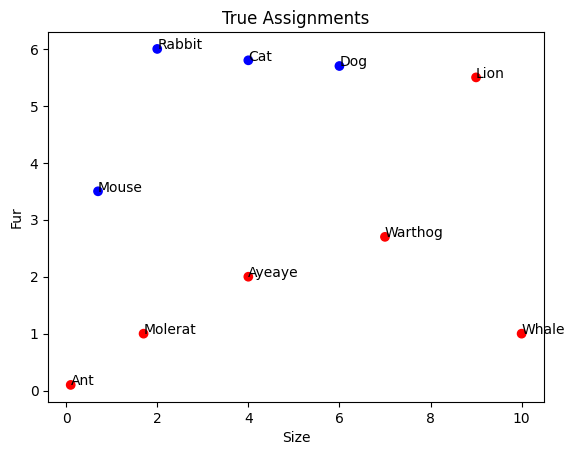

In [3]:
## Here's a basic plotting function, feel free to write your own
def PlotData(positions, labels,names=None):
	labels = [int(b) for b in labels] ## just to make sure the data is ints we can index in, not bools
	cols = ["red","blue"]
	x,y = zip(*positions)
	pt.scatter(x,y,color=np.array(cols)[labels])
	if names is not None:
		for i,pos in enumerate(positions):
			pt.annotate(names[i],pos)
	pt.show()

pt.title("True Assignments")
pt.xlabel("Size")
pt.ylabel("Fur")
PlotData(data,labels,names)

In [4]:
class Perceptron:

	def __init__(self):
		self.Weights = np.array([1.0,1,-1]) ## we'll use these pre-provided weights for now

	def Train(self,data,labels):
		##ignore this for now -- you'll fill it in later.
		return None

	def Predict(self,input):
		
		##this should return a value of 0 or 1, depending one how the Perceptron classifies the input vector
		## If you're feeling advanced, you might write this function to operate both on a single vector and a list-of-vectors. 
		return None ##??

## Initialise, then call your Perceptron on data. 

## Exercise 2: Training The Perceptron

You should (hopefully) now have a working Perceptron; the only issues is a) it's absolutely terrible and b) I had to give you the weights. 

The next challenge is to write up a training algorithm for the Perceptron. 

**Add a method (Train) to the Perceptron, which iterates over the dataset a number of times (you choose - when is 'enough'?) and updates the weights**

Remember, given a datum $\mathbf{x}$, a prediction $P$ and the correct label $L$ the update formula is:

\begin{equation}
	\mathbf{w} \to \mathbf{w} + r \times \left(L - P(\mathbf{x}) \right)\mathbf{x}
\end{equation}
Where $r$ is your learning rate. This formula serves to nudge the weights in a direction of the vector $\mathbf{x}$ whenever the classifier makes a false prediction (when $L \neq P$)

In [5]:
P = Perceptron()

P.Train(data,labels) ## fill in the Train method above!

## then test!

## Exercise 3: The Wrench in the Works

If everything has gone to plan, you now have an algorithm that can correctly identify whether a given animal is cute or note, based on measures of their size and amount of fur. 

Now try running your Perceptron training & testing routines on a new dataset: ```cuteness_augmented```.

**What goes wrong?**

In [6]:
names, labels, data = LoadCategoricalData("Data/cuteness_augmented.dat")
P = Perceptron()

P.Train(data,labels) 

## then test it, and find out what has gone wrong....

### Optional Task: The Nonlinear Perceptron

It is perfectly possible to generate a Perceptron which can deal with these difficult and non-linear cases: the trick is that you have to put the nonlinearity in yourself. 

If you have time, try the following:

**Write a nonlinear perceptron which transforms the input vector (x,y) into a nonlinear vector (such as (x,y,x^2,y^3 sin(x))), and then uses this as the vector in a standard Perceptron algorithm. Does it show any improvements? How much work does it take to make the algorithm perfectly separate our cute animals from the uggos?**



In [7]:
class NonLinearPerceptron:

	def __init__(self):
		self.Weights = None
	
	def Train(self, data, labels):
		return None
	def Predict(self, input):
		nonLinear = self.ConvertLinearVector(input) ## this is the magic trick. Why does it work?

		return None
	def ConvertLinearVector(self, input):
		transformedVector = input ## you should do something here to add in non-linearity!
		return transformedVector


### Optional Task: The XOR Problem

If you've managed to get a non-linear Perceptron working, you might be feeling pretty pleased with yourself! You've managed to (with a single node, in modern terminology) fit a highly nonlinear classifier. Let's see how far we can push it...

**In the Data directory are a series of datasets called ```XOR_n``` (where ```n``` ranges from 10 to 320). Try fitting these with your non-linear classifier. What goes wrong?**

In [8]:
names, labels, data = LoadCategoricalData("Data/XOR_10.dat")
P = NonLinearPerceptron()
P.Train(data,labels)
## then test -- and repeat with XOR_20, 40, 80 and higher
## What goes wrong?

## Exercise 4: A Multilayered Perceptron

We have seen that, although incredibly easy to implement and train, a Perceptron has fundamental limitations. In their normal form, they can only split a (hyperdimensional) plane into two parts; and even when we augment our input space with hand-crafted non-linearity, there are still some problems that it cannot solve. 

Let us assume, therefore, that the problem was *too few decision points*. The perceptron fundamentally, makes a choice if something is above or below a certain line. But some decisions are more complex than that. How can we let the Perceptron make more sub-decisions, before coming to a final conclusion? **A network of nodes!**

**Fill in the Network, Layer and Node classes such that they obey the following restrictions**
* A Network *has* a number of layers. 
* Each layer *has* a number of nodes. 
* Each node *has* an (individual) weight vector. 
* The dimension (length) of each weight vector is equal to the number of nodes in the previous layer **plus one**. 
	* The dimension of the weight vector in the first layer is equal to the dimension of your data **plus one**
	* These '+1' terms are needed for the bias. I recommend that you include the bias by augmenting your input vectors using ```augment = np.insert(vector,0,1)```
	* The reason for augmenting (rather than having a separate bias) will become clear when it is time to train!
* A Network takes as input a datum, and outputs a prediction. 
* A Layer takes as input the output from the previous layer (the first layer takes the network input)
	* The layer then gives that vector to each node, which performs $y_i = \mathbf{w}_i \cdot \begin{bmatrix} 1 \\ \mathbf{x} \end{bmatrix}$ on it. 
	* The layer then assembles each $y_i$ into a new vector $\mathbf{y}$. This is the output of the layer.
* The Network takes the output of the final layer and performs the usual Perceptron classifier on it: if the result is greater than 0 it returns "yes", if less than 0 it returns "no".

This sounds complex, but for now, is essentially just a complex series of handing vectors between the Network, the Layers and the Nodes. The nodes do a dot product, the Layers assemble that into a vector, and hand it off to the next layer. 


In [9]:

# A linear node is a simple perceptron node (without the >0 check). It's a dot product between the weights and the 
class Node:
	def __init__(self):
		self.Weights = np.zeros((0,)) ## initialise an empty vector -- we cannot populate it yet because we don't know how big it is. We only know when the Network has been assembled. 

	## this function informs the node of its dimensions, and is called by the Network & Layer after construction.
	def Initialise(self, dimension):
		return
	
	def Predict(self, inputVector):
		return None


## A layer is a collection of nodes. The layer takes an input vector, distributes them to the nodes, and then aggregates the data.
class Layer:
	def __init__(self,nodeCount, nodeType=Node):
		#nodeCount is the number of nodes in the data, and nodeType is a class object. Note that I have defined nodeType as the *class*, not a member of that class; this lets the layer call the initialiser itself, and avoid the copying issues python can sometimes encounter.

		## should initialise the nodes so that they contain nodeCount copies of the nodeType class. Be careful that you initialise the node (so call nodeType()).
		self.Nodes = []

	def Initialise(self,previousLayerDimension):
		#initialise all of the component nodes.
		return
	
	def Predict(self, inputVector):
		#this should pass the vector to each node, and assemble the output into a vector, which is returned
		return



## The Network class is your ``
class Network:
	def __init__(self, inputDimension, outputDimension=1):
		#input dimension is the dimension of your data -- so [x,y] is 2. 
		#output dimension is the dimension of your prediction -- for now this is a binary yes/no -- so one dimension. 

		self.Layers = [] #this is where your layers will go
		self.InputDimension = inputDimension
		self.OutputDimension = outputDimension

	def AddLayer(self, layerObject): #append a layer object into your network. 
		self.Layers.append(layerObject)

	def Initialise(self):
		##need an initialisation function because your network doesn't know (for instance) what dimension each of the weight vectors should be until it can see the final layer structure -- remember the dimension of the n-th layer weight vectors is equal to the number of nodes in the (n-1)th layer. 


		## this funciton should initialise each layer, giving them the correct information

		return 
	
	def Predict(self, inputVector):

		#this is the feedforward pass - give the input vector to layer 0, then feed the output into the next layer, and so on and so on.
		return 
	
	def Train(self, data,labels):

		#Leave this for now. It's going to be a big one!
		return


	
			

### Testing Your Network

After writing the code to fill in all these objects, construct a network with some number of layers, each with a custom number of nodes -- I've suggested a layout below.

Randomly initialise the weights of the network to values between -1 and 1 (make sure the nodes initialise independently -- the nodes on each layer should have different weights). 

**Test your network by scanning the space $0 < x,y < 10$. What behaviour do you observe in your network? Does it change if you alter the random initialisation?**



In [10]:
np.random.seed(1)
network = Network(2,1)
network.AddLayer(Layer(5))
network.AddLayer(Layer(3))
network.AddLayer(Layer(1))
network.Initialise()

##scan over the (x,y) plane for 0 < x,y < 10 and observe the behaviour of your predictor. Can you identify its behaviour?

### Exercise 5: Solving Our Problems

The problem identified above can *only* be solved by altering the way our neurons/nodes work.

**Write you own custom node activation function, then retest your network. Did this fix the problematic behaviour?**

In [12]:
## if you've written you original Node class well, then it suffices to make a child class which just overloads the Predict method!
class CustomNode (Node):

	def Predict(self, inputVector):
		return None ##write your own function here. What functions work, which don't?
	
np.random.seed(1)
network = Network(2,1)
network.AddLayer(Layer(5,CustomNode)) ##passed as references to the object, not as actual member-objects. Permits unique initialisations
network.AddLayer(Layer(3,CustomNode))
network.AddLayer(Layer(1))
network.Initialise()

##scan over the (x,y) plane for 0= < x,y < 10 and observe the behaviour of your predictor (you might have to go beyond 0->10 if your plane looks boring!). Did you fix the issues of the previous example? 

## Training A Network

This is the big one. This is where our maths is going to *hurt*. We now want to try and make our network learn the parameters which make it work. 

Unlike the Perceptron, this 'learning' is best approached through the language of calculus. Unfortunately that means that we need to move away from our hard decision boundaries (which are non-continuous and therefore non-differentiable), and move to a smooth `cost function'. 

This cost function is small when a set of predictions is close to being correct, and large when it is far away. 

If we treat our output node as producing $P$, a *probability* of being cute (0 being 100% ugly, 1 being 100% cute), then a reasonable cost function could be something along the following lines:

\begin{equation}
	\mathcal{L} = \sum_{\text{data } i} \left(P_i - L_i\right)^2
\end{equation}
This least squares cost function meets our criteria: it is zero when the predictor guesses everything correctly ($P_i = L_i$), and it is larger than zero when it is wrong, or uncertain. 

We now simply need to find the set of weights / network parameters which optimize this function. This is a basic gradient descent task. 

Which means...we need the gradients. Rather than seeing our function $\mathcal{L}$ as a function of the input data conditioned on the weights, we treat it as a function of the weights, conditioned on the data:
\begin{equation}
	\mathcal{L} = \mathcal{L}(\{\vec{w} \}| \vec{d})
\end{equation}
Here $\{\vec{w}\}$ is the set of weights on each node. We need to find:
\begin{equation}
	\frac{\partial \mathcal{L}}{\partial \vec{w}_i} = 2\sum_i  \left(P_i - L_i\right) \frac{\partial P_i}{\partial \vec{w}}
\end{equation}

### Working Your Way Backwards



## Exercise 6: Writing a Trainer

If you are confident in your coding abilities and your grasp of the mathematics, then I encourage you to try and adapt your existing Network/Layer/Nodes by including a Training operation which executes the chain rule equations explained above. 

I am, however, aware that this might seem a daunting task. 

I have therefore prepared an alternative route: you may use this to augment your attempts to write your own backpropagation, or you might rely solely on this. It doesn't matter: all that matters is that you spend some time now trying to draw the lines between the arcane theory I have explained, and the bare-metal code which is being executed.


### Code Jigsaw

The following code outlines the *barest possible bones* of a class structure for a Network, Layer, Node plus a handful of other useful objects. 

You will note, however, that the code contains only member function names and arguments. There is no code written here. 

In the file ```Data/jigsaw.py``` you will find a number of functions. They have been anonymised: all variables reduced to single letters and names replaced with generic ones: all function calls have been replaced with ```member_x()```.

Using the class structure in front of you, and your new knowledge of how neural networks function, disentangle this code and use it to write your own version which is -- hopefully -- slightly less obtuse and difficult to read.

**(Not all functions return values -- I just added return calls so that this code block wouldn't hurl errors at me due to empty code!)**

In [58]:
class CostFunction:
	def Compute(self,prediction,label):
		return
	def Gradient(self,prediction,label):
		return
	
class Node:

	def Initialise(self, dimension):
		return
	def Predict(self, inputVector): 
		return
	def ActivationFunction(self, inputValue): 
		return
	def ActivationGradient(self, inputValue): 
		return
	
	def UpdateGradient(self, dLdY, inputVector): 
		return 
	 
	def UpdateWeights(self,alpha):
		return 

class SigmoidNode (Node):

	def ActivationFunction(self, y):
		return
		
	def ActivationGradient(self, y):
		return 
	
class ReluNode (Node): #technically this is leaky, but it makes the gradients easier.

	def ActivationFunction(self, y):
		return 
	
	def ActivationGradient(self, y):
		return

class Layer:
	def __init__(self,nodeCount, nodeType=Node):
		return
		
	def Initialise(self,previousLayerDimension):
		return

	def Predict(self, inputVector):
		return 

	def MiddleLayerGradient(self,layerAbove,inputVector):
		return

	def FinalLayerGradient(self,dLdP,inputVector):
		return

	def UpdateWeights(self,alpha):
		return

	
class Network:
	def __init__(self, inputDimension, outputDimension=1):
		return

	def AddLayer(self, layerObject):
		return

	def Initialise(self):
		return
	
	def Predict(self, inputVector):
		return 
	
	def Train(self, data,labels,costFunc = CostFunction(),Nsteps=1000):
		
		return